# Preliminary Analysis


### Imports

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

### Load Dataset

In [2]:
df = pd.read_csv("sudoku.csv")

### Basic Statistics

In [3]:
df.head()

,id,puzzle,solution,clues,difficulty
0,1,1..5.37..6.3..8.9......98...1.......8761.........,1985437266432785915276198439147352688761924352...,27,2.2
1,2,...81.....2........1.9..7...7..25.934.2..........,9348172567286534196159427381764258934523981673...,23,0.0
2,3,..5...74.3..6...19.....1..5...7...2.9....58..7...,2159837463876542194692713855387169249413258677...,25,2.6
3,4,........5.2...9....9..2...373..481.....36....5...,4738169256285397411954278637329481569413652785...,26,1.4
4,5,.4.1..............653.....1.8.9..74...24..91.....,9471536821286493576532874913819267455724389164...,25,1.1


In [4]:
df.tail()

,id,puzzle,solution,clues,difficulty
2999995,2999996,7..........2......9.6.28.1....28..3.......5.4....,7834512964129768539563284175712846392691375848...,23,5.0
2999996,2999997,.5......2...58...1..7..16....2...4...849.3...9...,1594368722465879318372916543126754896849237159...,24,4.1
2999997,2999998,.....9.48...6..3....4.87.5...71.2..5.....6..9....,1735296482856413976943872514371928655218764399...,25,0.0
2999998,2999999,......23....8..796..5.......987.1....342.59..6...,8764192354138527969253761842987416531342659786...,24,0.0
2999999,3000000,7.4..6.8.6....85.4.9........1..........2.54......,7541369826237985141984526734153697288762154399...,24,1.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000000 entries, 0 to 2999999
Data columns (total 5 columns):
 #   Column      Dtype  
---  ------      -----  
 0   id          int64  
 1   puzzle      object 
 2   solution    object 
 3   clues       int64  
 4   difficulty  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 114.4+ MB


In [6]:
df.describe()

,id,clues,difficulty
count,3.000000e+06,3.000000e+06,3.000000e+06
mean,1.500000e+06,2.430547e+01,1.238623e+00
std,8.660255e+05,1.102716e+00,1.272755e+00
min,1.000000e+00,1.900000e+01,0.000000e+00
25%,7.500008e+05,2.400000e+01,0.000000e+00
50%,1.500000e+06,2.400000e+01,1.200000e+00
75%,2.250000e+06,2.500000e+01,2.200000e+00
max,3.000000e+06,3.100000e+01,8.500000e+00


### Clue Distribution
We can see that the clues feature is somewhat normally distributed and centered at about 24. The vast majority of clues are between 23 and 26.

24    1058407
25     865548
23     556412
26     327826
22     115931
27      61228
21       8204
28       5926
29        297
20        210
30          9
19          1
31          1
Name: clues, dtype: int64


<AxesSubplot:xlabel='clues', ylabel='count'>

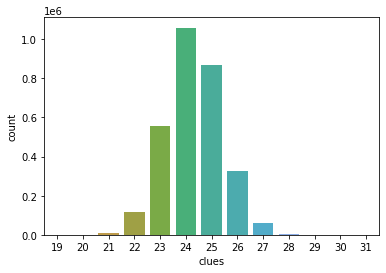

In [7]:
print(df.clues.value_counts())
sns.countplot(data=df, x="clues")

### Difficulty Distribution
We can see that the difficulty feature is very left skewed. The vast majority of difficulties are 0. Generally, as the difficulty increases, there are less samples. This may make it difficult to find patterns for higher difficulties because there are very little samples to train on.

Counts:
 0.0    1294081
1.0      91570
1.4      85081
1.5      84909
1.6      83935
        ...   
8.4          1
8.3          1
8.5          1
7.8          1
8.2          1
Name: difficulty, Length: 76, dtype: int64

More than 100 instances:
 0.0    1294081
1.0      91570
1.4      85081
1.5      84909
1.6      83935
1.3      83737
1.7      81066
1.2      78932
1.8      78911
1.9      76141
2.0      73067
2.1      70059
1.1      68137
2.2      66185
2.3      62485
2.4      58971
2.5      55218
2.6      51266
2.7      48165
2.8      45056
2.9      40702
3.0      37421
3.1      34114
3.2      31191
3.3      27770
3.4      25096
3.5      22476
3.6      20098
3.7      17528
3.8      15585
3.9      13623
4.0      11795
4.1      10226
4.2       9016
4.3       7607
4.4       6510
4.5       5607
4.6       4651
4.7       3970
4.8       3258
4.9       2762
5.0       2236
5.1       1930
5.2       1544
5.3       1200
5.4       1027
5.5        794
5.6        639
5.7        554
5.8        425
5.9   

<AxesSubplot:xlabel='difficulty', ylabel='count'>

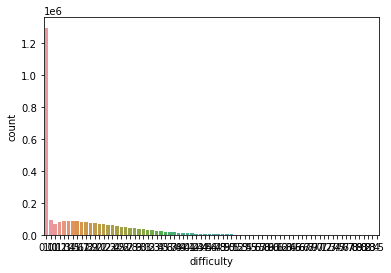

In [8]:
difficulties = df.difficulty.value_counts()
print("Counts:\n", difficulties)
print()
print("More than 100 instances:\n", difficulties.loc[difficulties > 100])
sns.countplot(data=df, x="difficulty")

### Reduce Zero Difficulty Samples
- There are more than 1 million samples with zero difficulty
- Reducing the number of zero difficulty samples to 100,000

In [9]:
n_drop = len(df.loc[df["difficulty"] == 0]) - 100000
df = df.drop(df[df["difficulty"] == 0].sample(n_drop).index)
df

,id,puzzle,solution,clues,difficulty
0,1,1..5.37..6.3..8.9......98...1.......8761.........,1985437266432785915276198439147352688761924352...,27,2.2
2,3,..5...74.3..6...19.....1..5...7...2.9....58..7...,2159837463876542194692713855387169249413258677...,25,2.6
3,4,........5.2...9....9..2...373..481.....36....5...,4738169256285397411954278637329481569413652785...,26,1.4
4,5,.4.1..............653.....1.8.9..74...24..91.....,9471536821286493576532874913819267455724389164...,25,1.1
7,8,38.1.........5.6.....9....3.4.........5.18.......,3861729544198536725279468137413652986952184372...,25,3.7
...,...,...,...,...,...
2999994,2999995,...3...61..4.......5....4.22.8...3....9.1.82.....,8273549611942765383561984722784653195697138244...,24,1.5
2999995,2999996,7..........2......9.6.28.1....28..3.......5.4....,7834512964129768539563284175712846392691375848...,23,5.0
2999996,2999997,.5......2...58...1..7..16....2...4...849.3...9...,1594368722465879318372916543126754896849237159...,24,4.1
2999998,2999999,......23....8..796..5.......987.1....342.59..6...,8764192354138527969253761842987416531342659786...,24,0.0


In [10]:
print("Total record count:", len(df))
print("Records with zero difficulty:", len(df.loc[df["difficulty"] == 0]))

Total record count: 1805919
Records with zero difficulty: 100000


<AxesSubplot:xlabel='difficulty', ylabel='count'>

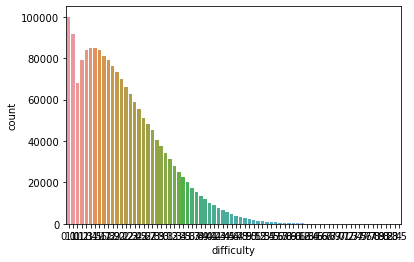

In [11]:
sns.countplot(data=df, x="difficulty")

### Data Cleaning
- Remove "id" feature
- Convert periods in "puzzle" feature to zeros
- Split "puzzle" feature into 81 individual features

In [12]:
# Remove "id" feature
df = df.drop(columns=["id"])
df.head()

,puzzle,solution,clues,difficulty
0,1..5.37..6.3..8.9......98...1.......8761.........,1985437266432785915276198439147352688761924352...,27,2.2
2,..5...74.3..6...19.....1..5...7...2.9....58..7...,2159837463876542194692713855387169249413258677...,25,2.6
3,........5.2...9....9..2...373..481.....36....5...,4738169256285397411954278637329481569413652785...,26,1.4
4,.4.1..............653.....1.8.9..74...24..91.....,9471536821286493576532874913819267455724389164...,25,1.1
7,38.1.........5.6.....9....3.4.........5.18.......,3861729544198536725279468137413652986952184372...,25,3.7


In [13]:
# Convert periods in "puzzle" feature to zeros
df["puzzle"] = df["puzzle"].apply(lambda x: x.replace(".", "0"))
df.head()

,puzzle,solution,clues,difficulty
0,1005037006030080900000098000100000008761000000...,1985437266432785915276198439147352688761924352...,27,2.2
2,0050007403006000190000010050007000209000058007...,2159837463876542194692713855387169249413258677...,25,2.6
3,0000000050200090000900200037300481000003600005...,4738169256285397411954278637329481569413652785...,26,1.4
4,0401000000000000006530000010809007400024009100...,9471536821286493576532874913819267455724389164...,25,1.1
7,3801000000000506000009000030400000000050180000...,3861729544198536725279468137413652986952184372...,25,3.7


In [14]:
# Split "puzzle" feature into 81 individual features
X = df["puzzle"].str.split("", expand=True)
for i in range(81):
    df[f"x{i}"] = X[i + 1]
df.head()

,puzzle,solution,clues,difficulty,x0,x1,x2,x3,x4,x5,...,x71,x72,x73,x74,x75,x76,x77,x78,x79,x80
0,1005037006030080900000098000100000008761000000...,1985437266432785915276198439147352688761924352...,27,2.2,1,0,0,5,0,3,...,4,7,0,0,0,6,0,3,1,2
2,0050007403006000190000010050007000209000058007...,2159837463876542194692713855387169249413258677...,25,2.6,0,0,5,0,0,0,...,0,8,0,0,0,0,0,1,0,3
3,0000000050200090000900200037300481000003600005...,4738169256285397411954278637329481569413652785...,26,1.4,0,0,0,0,0,0,...,0,0,0,9,7,8,0,0,0,2
4,0401000000000000006530000010809007400024009100...,9471536821286493576532874913819267455724389164...,25,1.1,0,4,0,1,0,0,...,0,0,0,4,0,0,1,0,0,3
7,3801000000000506000009000030400000000050180000...,3861729544198536725279468137413652986952184372...,25,3.7,3,8,0,1,0,0,...,6,0,0,4,0,8,0,0,2,0


### Relationship Between Clues and Difficulty
There is not a clear cut relationship between clues and difficulty. I expected the relationship to clearly indicate that more clues results in lower difficulty. That is obviously not the case as seen from the plot. However, it can be noted that the maximum difficulty does somewhat have a relationship with clues. What surprised me was that the relationship was not monotonic. It seems the number of clues that results in the highest difficulty is 23. The max difficulty decreases as you increase the number of clues beyond 23. However, decreasing the number of clues below 23 also decreases the max difficulty, which I did not expect. Furthermore, training linear regression and random forest models using clues to predict difficulty yielded R squared values of nearly zero, further indicating that clues alone is not a good predictor for difficulty.

<AxesSubplot:xlabel='clues', ylabel='difficulty'>

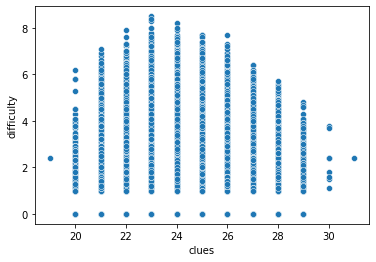

In [15]:
sns.scatterplot(data=df, x="clues", y="difficulty")

In [16]:
# Using clues to predict difficulty
X = df["clues"].to_numpy().reshape(-1, 1)
y = df["difficulty"]

# Split data 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [17]:
def clues_vs_difficulty(model):
    # Train model
    model.fit(X_train, y_train)

    # Predict values for train and test
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Print R squared scores
    print("Train R2:", r2_score(y_train, y_train_pred))
    print("Test R2:", r2_score(y_test, y_test_pred))

In [18]:
clues_vs_difficulty(LinearRegression())

Train R2: 0.00010521381732819801
Test R2: 0.0001277782683186679


In [19]:
clues_vs_difficulty(RandomForestRegressor())

Train R2: 0.00041685322138207415
Test R2: 0.0004663327772612691
